# Ford GoBike System Data Exploration
## by (Tarek Fayyad)

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.
>In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019.The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
>https://en.wikipedia.org/wiki/Bay_Wheels<br>
>The dataset containing information about Ford GoBike system data for 183,412 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### Dataset structure before cleaning and processing

> There are 183412 observation of fordgobike trips in the dataset with 16 featuress (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).<br> <br>
>Out of 16 features:<br>
>* 9 are numerical (duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude ,end_station_longitude, bike_id,member_birth_year).<br>    
>* 8 are object type (start_time, end_time, start_station_name, end_station_name,user_type, member_gender, bike_share_for_all_trip).




### Data Cleaning

In [7]:
#convert start_time & end_time from object to date time
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [8]:
#split start_time to start_date and start_time
df['start_time'] = df['start_time'].astype(str)

In [9]:
df[['start_date','start_time']] = df['start_time'].str.split(expand=True)

In [10]:
#split start_time to start_date and start_time
df['end_time'] = df['end_time'].astype(str)

In [11]:
df[['end_date','end_time']] = df['end_time'].str.split(expand=True)

In [12]:
#convert start_date, start_time, end_date, end_time to datetime
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['start_time'] = pd.to_datetime(df['start_time']).dt.time
df['end_date'] = pd.to_datetime(df['end_date']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.time

In [13]:
#create start_month, start_weekday
#df['start_month'] = pd.to_datetime(df['start_date']).dt.month_name()
df['weekday'] = pd.to_datetime(df['start_date']).dt.day_name()

In [14]:
#create start hour and end hour
df['start_time'] = (df['start_time']).astype(str)
df['end_time'] = (df['end_time']).astype(str)

In [15]:
df['start_hr'] = df['start_time'].str.split(':').str.get(0)
df['end_hr'] = df['end_time'].str.split(':').str.get(0)

In [16]:
#convert start_hr, end_hr to int
df['start_hr'] = df['start_hr'].astype(int)
df['end_hr'] = df['end_hr'].astype(int)

In [17]:
#convert duration from second to minute
df['duration'] = (df['duration_sec']/60).round(1)

In [18]:
#checking null value
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_date                    0
end_date                      0
weekday                       0
start_hr                      0
end_hr                        0
duration                      0
dtype: int64

In [19]:
#drop null value
df.dropna(inplace = True)

In [20]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
end_date                   0
weekday                    0
start_hr                   0
end_hr                     0
duration                   0
dtype: int64

In [21]:
#compute distance between start_station and end station in meters
start = []
for i in zip(df['start_station_latitude'],df['start_station_longitude']):
    start.append(i)

In [22]:
end = []
for i in zip(df['end_station_latitude'],df['end_station_longitude']):
    end.append(i)

In [23]:
from geopy.distance import great_circle
dist = []
count = 0
for i in zip(start,end):
    distance = (great_circle(start[count], end[count]).meters)
    distance = round(distance)
    dist.append(distance)
    count +=1    
len(dist)

174952

In [24]:
df['distance'] = dist

In [25]:
#calculate user age till 2019
df['current'] = np.repeat(2019, df.shape[0])

In [26]:
df['age'] = df['current']-df['member_birth_year']
df['age'] = df['age'].astype(int)

In [27]:
#checking age
less_10 = df.query("age<=12")
less_10.index

Int64Index([], dtype='int64')

In [28]:
#checking birth year
less_1950  = df.query("member_birth_year < 1950")
less_1950.index

Int64Index([  1073,   1285,   1586,   2085,   2366,   2484,   3207,   4485,
              4797,   4818,
            ...
            179280, 180541, 180728, 180928, 181019, 182396, 182830, 183222,
            183385, 183388],
           dtype='int64', length=674)

In [29]:
great_2010  = df.query("member_birth_year > 2010")
great_2010.index

Int64Index([], dtype='int64')

In [30]:
#drop unreal birth year
df.drop(less_1950.index, inplace=True)

In [31]:
#convert birth year to int
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [32]:
#convert bike_share_for_all_trip to bool
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype(bool)

In [33]:
# reset index
df.reset_index(inplace=True)

In [34]:
#drop unnecessary columns
df.columns

Index(['index', 'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'end_date', 'weekday', 'start_hr', 'end_hr', 'duration',
       'distance', 'current', 'age'],
      dtype='object')

In [35]:
df.drop(columns=['start_time', 'end_time','bike_id','duration_sec','start_station_id','start_station_latitude','start_date','end_date',
       'start_station_longitude','current','bike_share_for_all_trip','member_birth_year' ,'end_station_id','end_station_latitude', 'end_station_longitude','index'],inplace = True)

In [36]:
df.head(3)

,start_station_name,end_station_name,user_type,member_gender,weekday,start_hr,end_hr,duration,distance,age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,Thursday,17,8,869.8,545,35
1,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,Thursday,12,5,1030.9,2705,47
2,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,Thursday,17,4,608.2,261,30


In [37]:
df.shape

(174278, 10)

In [38]:
#save clean csv
df.to_csv('modified_bike.csv',index=False)

# What is the structure of your dataset?

> There are 174278 observation of fordgobike trips in the dataset with 10 featuress (start_station_name, end_station_name, user_type, member_gender, age, distance, start_hr, end_hr, weekday, duration).<br> <br>
>Out of 10 features:<br>
>* 4 is numerical (age, distance, start_hr, end_hr).<br>
>* 2 are datetime (weekday, duration).
>* 4 are object type (start_station_name, end_station_name, user_type, member_gender).


### What is/are the main feature(s) of interest in your dataset?

> My main interset is GoBike rental duration (duration in minutes) and its dependence on other features.<br>
> Also, I want to explore most frequent start station and most frequent end station.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration, distance, gender, age, user_type, start_hr, weekday.

In [39]:
dfc = pd.read_csv('modified_bike.csv')

In [40]:
dfc.shape

(174278, 10)

In [41]:
dfc.head(3)

,start_station_name,end_station_name,user_type,member_gender,weekday,start_hr,end_hr,duration,distance,age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,Thursday,17,8,869.8,545,35
1,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,Thursday,12,5,1030.9,2705,47
2,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,Thursday,17,4,608.2,261,30


In [42]:
# Checking duration in minutes
dfc['duration'].describe()

count    174278.000000
mean         11.737515
std          27.410872
min           1.000000
25%           5.400000
50%           8.500000
75%          13.200000
max        1409.100000
Name: duration, dtype: float64

>From duration inspection, there is extreme values (outliers) that will interfer my analysis. That need more investigation, for the meanwhile I will take interquantile range of duration + 1.5 times interquartile range and exlude other range.

In [43]:
thrid_qaurt = dfc['duration'].describe()[6]
first_quart = dfc['duration'].describe()[3]
IQR = thrid_qaurt - first_quart
IQR

12.2

In [44]:
# find outlier
lower_range = first_quart - 1.5*IQR
upper_range = thrid_qaurt + 1.5*IQR
lower_range , upper_range

(-17.299999999999997, 31.499999999999996)

In [45]:
range_to_exlude = df.query("duration>35").index

In [46]:
dfc.drop(range_to_exlude, inplace=True)

In [47]:
#save  csv with new duration range
dfc.to_csv('modified_bike_1.csv',index=False)

In [48]:
#reading modified file
dfc = pd.read_csv('modified_bike_1.csv')

## Univariate Exploration

In [49]:
#exploring dfc
#from tableone import TableOne

In [50]:
##columns = ['user_type','member_gender','start_weekday','duration_min','distance','age']
#categorical = ['user_type','member_gender','start_weekday']
#groupby = 'duration_min'

In [51]:
#mytable = TableOne(data =dfc  , columns=columns, categorical=categorical, groupby=groupby)
#mytable

In [52]:
#exploring dfc duration with other features
dfc.groupby('duration')[['user_type','member_gender','weekday','distance','age']].count()


,user_type,member_gender,weekday,distance,age
duration,,,,,
1.0,53,53,53,53,53
1.1,110,110,110,110,110
1.2,207,207,207,207,207
1.3,185,185,185,185,185
1.4,254,254,254,254,254
...,...,...,...,...,...
34.6,31,31,31,31,31
34.7,21,21,21,21,21
34.8,27,27,27,27,27


c:\users\htm\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


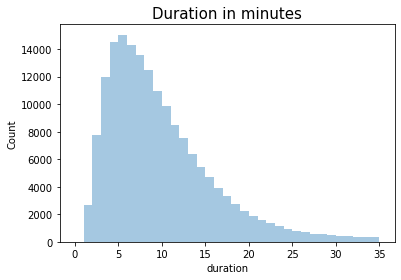

In [53]:
# checking trip duration
bins = np.arange(0, dfc['duration'].max()+1,1)
sb.distplot(dfc['duration'], bins = bins, kde = False);
plt.title('Duration in minutes',fontsize = 15);
plt.ylabel('Count');

In [54]:
dfc['duration'].describe()

count    170131.000000
mean          9.771363
std           6.056899
min           1.000000
25%           5.300000
50%           8.400000
75%          12.700000
max          35.000000
Name: duration, dtype: float64

In [55]:
dfc['duration'].value_counts()

5.4     1794
4.8     1760
4.6     1748
5.6     1740
5.8     1729
        ... 
33.1      24
33.5      24
31.9      23
34.7      21
34.3      21
Name: duration, Length: 341, dtype: int64

>The trip duration averge between 1 to 35 minutes with averge of 9.7 minutes, peak duration of user is at 5.4 minutes ,75% of duration range is about 12.7 minutes. The duration distrubition is right skewed.

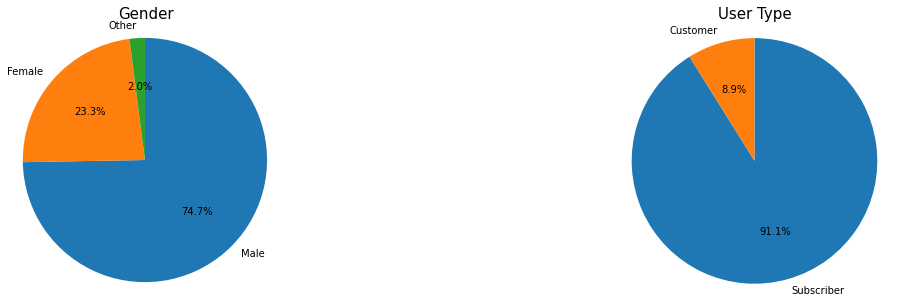

In [56]:
# checking Gender and user types
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sorted_counts = dfc['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%');
plt.title('Gender',fontsize = 15);
plt.axis('square');
plt.subplot(1, 2, 2)
sorted_counts = dfc['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%');
plt.title('User Type',fontsize = 15);
plt.axis('square');

In [57]:
#proportion of female subscriber
dfc.query("member_gender=='Female'&user_type=='Subscriber'").shape[0]/df.query("user_type=='Subscriber'").shape[0]

0.22464181564599975

In [58]:
##proportion of male subscriber
dfc.query("member_gender=='Male'&user_type=='Subscriber'").shape[0]/df.query("user_type=='Subscriber'").shape[0]

0.7389248129833904

In [59]:
#proportion of female customer
dfc.query("member_gender=='Female'&user_type=='Customer'").shape[0]/df.query("user_type=='Customer'").shape[0]

0.24954649897206432

In [60]:
#proportion of male subscriber
dfc.query("member_gender=='Male'&user_type=='Customer'").shape[0]/df.query("user_type=='Customer'").shape[0]

0.6387713145483129

>The male proportion is about three times female proportion, with respectively 74.6%,and 23.4%.<br>
>The subscriber proportion is about 10 times customer proportion, with respectively 90.5% and 9.5%.<br>
>Proportion of female subscriber is 22.5%, proportion of female customer is 25%.<br>
>Proportion of male subscriber is 74%, proportion of male customer is 64%.

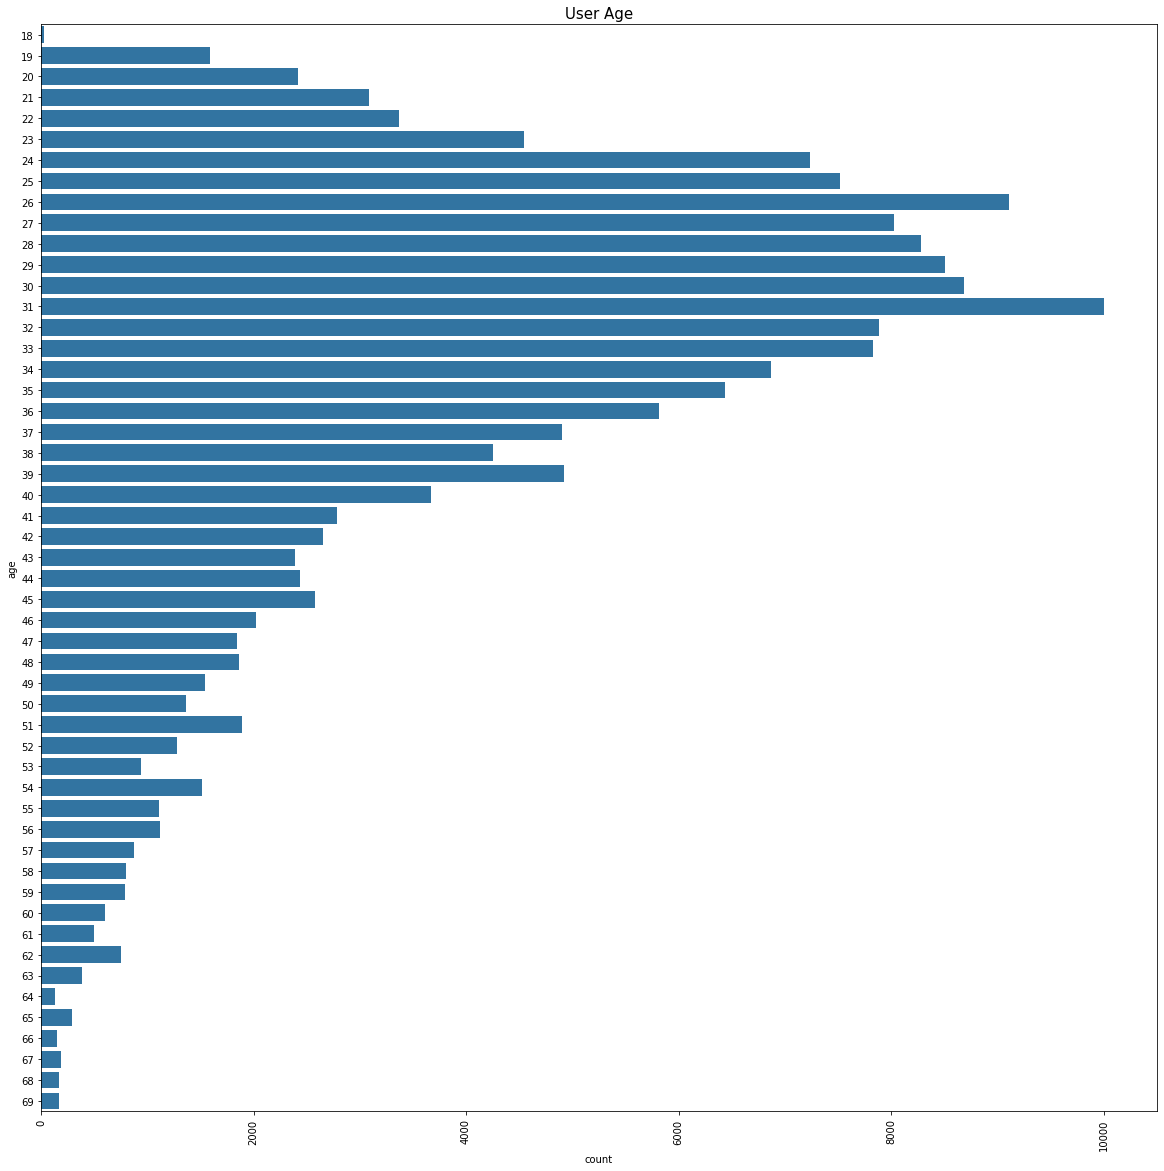

In [61]:
#checking user age
base_color = sb.color_palette()[0]
freq = dfc['age'].value_counts()
birth_order = freq.index
plt.figure(figsize = [20, 20])
sb.countplot(data=dfc, y='age',color=base_color );
plt.title('User Age',fontsize = 15);
plt.xticks(rotation=90);

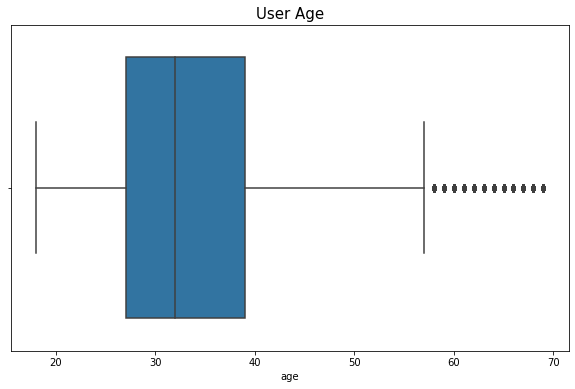

In [62]:
#age boxplot
plt.figure(figsize = [10, 6])
sb.boxplot(data=dfc, x='age');
plt.title('User Age',fontsize = 15);

In [63]:
#find 5 number of age
dfc['age'].describe()

count    170131.000000
mean         34.001105
std           9.641586
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          69.000000
Name: age, dtype: float64

In [64]:
#exploring other features at age 31
dfc.query("age==31").describe()

,start_hr,end_hr,duration,distance,age
count,10001.000000,10001.000000,10001.000000,10001.00000,10001.0
mean,13.453755,13.590041,9.952495,1807.00350,31.0
std,4.699754,4.707135,6.028872,1091.16581,0.0
min,0.000000,0.000000,1.000000,0.00000,31.0
25%,9.000000,9.000000,5.600000,1030.00000,31.0
50%,14.000000,14.000000,8.600000,1548.00000,31.0
75%,17.000000,18.000000,12.700000,2336.00000,31.0
max,23.000000,23.000000,35.000000,12410.00000,31.0


In [65]:
#exploring other features at age from 24 to 33
dfc.query("age>=24 and age<=33").describe()

,start_hr,end_hr,duration,distance,age
count,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000
mean,13.558755,13.699280,9.787784,1725.658545,28.587428
std,4.827826,4.835726,5.936028,1058.925262,2.806311
min,0.000000,0.000000,1.000000,0.000000,24.000000
25%,9.000000,9.000000,5.400000,949.000000,26.000000
50%,14.000000,14.000000,8.400000,1474.000000,29.000000
75%,18.000000,18.000000,12.700000,2276.000000,31.000000
max,23.000000,23.000000,35.000000,12410.000000,33.000000


>The user age ranging from 18 to 69 years old with averge of 34 years old.<br>
>Users with age of 31 years old are the most users of  GoBike with averge distance of 1807 meters and averge duration of 10 minutes.<br>
>Age range from 24 to 33 years old are the most users of GoBike with averge distance of 1725 meters and averge duration of 9.8 minutes.<br>
>Age range from 55 to 69 years old are the least users of Gobike.<br> 
>Users with 18 years old are rarely using GoBike.


c:\users\htm\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


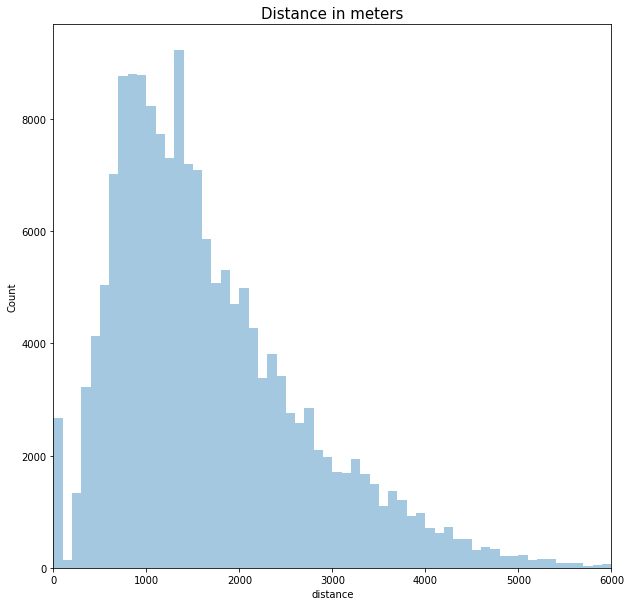

In [66]:
#checking distance
plt.figure(figsize = [10, 10])
bins = np.arange(0, dfc['distance'].max()+100,100)
sb.distplot(dfc['distance'], bins = bins, kde = False);
plt.title('Distance in meters',fontsize = 15);
plt.xlim(0, 6000);
plt.ylabel('Count');

In [67]:
#find 5 number for distance
dfc['distance'].describe()

count    170131.000000
mean       1686.716089
std        1060.610612
min           0.000000
25%         918.000000
50%        1430.000000
75%        2216.000000
max       12410.000000
Name: distance, dtype: float64

In [68]:
dfc['distance'].value_counts()

0       2655
1036     727
1349     677
1039     604
1310     593
        ... 
7195       1
1230       1
6690       1
3122       1
4937       1
Name: distance, Length: 4779, dtype: int64

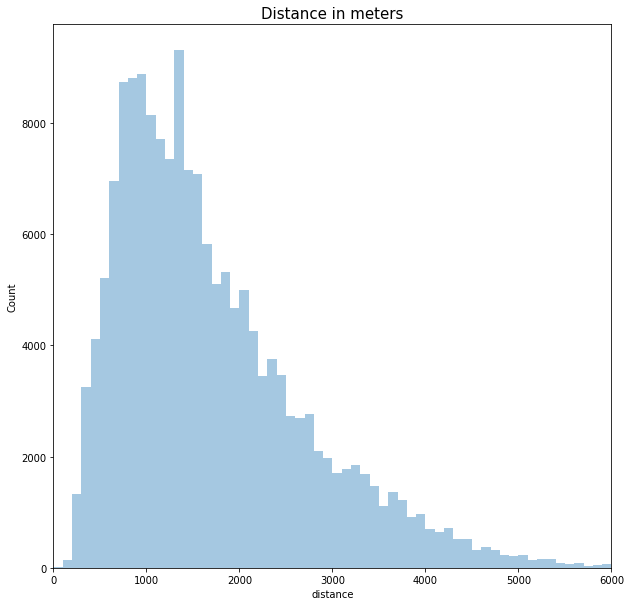

In [69]:
#checking distance without 0 meter
plt.figure(figsize = [10, 10])
bins = np.arange(1, dfc['distance'].max()+100,100)
sb.distplot(dfc['distance'], bins = bins, kde = False);
plt.title('Distance in meters',fontsize = 15);
plt.xlim(0, 6000);
plt.ylabel('Count');

In [70]:
#checking other features at distance 0
dfc.query("distance==0").describe()

,start_hr,end_hr,duration,distance,age
count,2655.000000,2655.000000,2655.000000,2655.0,2655.000000
mean,14.061017,14.259510,12.735932,0.0,33.678719
std,4.685839,4.702618,10.217150,0.0,11.300995
min,0.000000,0.000000,1.000000,0.0,18.000000
25%,11.000000,11.000000,2.900000,0.0,25.000000
50%,14.000000,14.000000,10.600000,0.0,30.000000
75%,17.000000,18.000000,21.000000,0.0,39.000000
max,23.000000,23.000000,35.000000,0.0,69.000000


In [71]:
#checking other features at distance > 0
dfc.query("distance>0").describe()

,start_hr,end_hr,duration,distance,age
count,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000
mean,13.436451,13.574835,9.724366,1713.455629,34.006216
std,4.752022,4.759587,5.955820,1047.335031,9.612926
min,0.000000,0.000000,1.000000,13.000000,18.000000
25%,9.000000,9.000000,5.300000,938.000000,27.000000
50%,14.000000,14.000000,8.300000,1452.000000,32.000000
75%,17.000000,18.000000,12.600000,2237.000000,39.000000
max,23.000000,23.000000,35.000000,12410.000000,69.000000


>The distance range from 0 to 12410 meters with averge of 1686 meters.<br>
>Most of users make trip that range from 900 to 1500 meters.<br>
>There is a lot of distrubition at 0 distance(users return to start station) with duration range from 1 to 35 minutes with average duration of 12.7 minutes.<br>
>At distance > 0, distance range from 13 to 12410 meters with averge of 1713 meters, duration range from 1 to 35 minutes with average of 9.7 minutes.

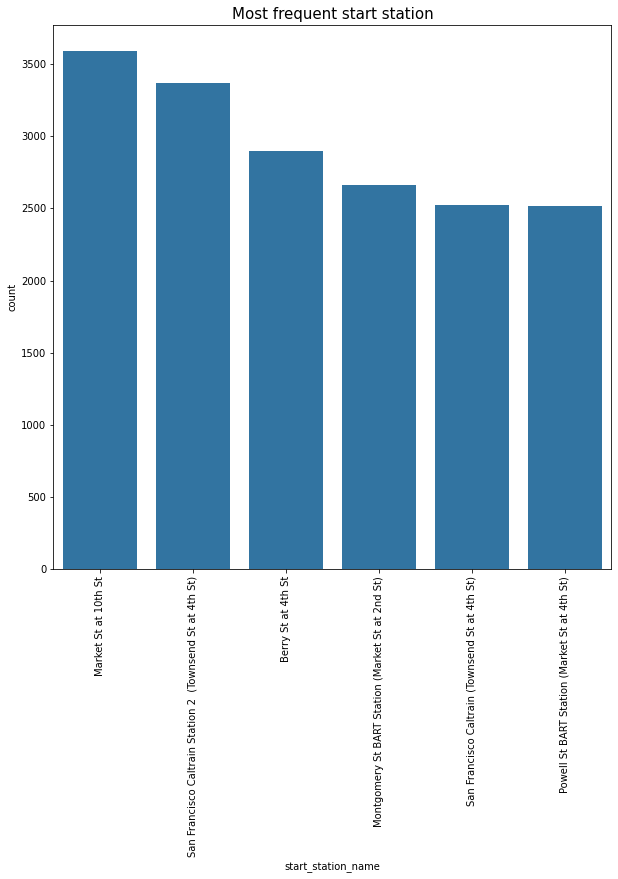

In [72]:
#checking most frequent start station
base_color = sb.color_palette()[0]
station_order = dfc['start_station_name'].value_counts()[:6].index
plt.figure(figsize = [10, 10])
sb.countplot(data=dfc, x='start_station_name',color=base_color,order=station_order );
plt.title('Most frequent start station',fontsize = 15);
plt.xticks(rotation=90);

>Most frequent start station are: Market St at 10th St, San francisco station2, Bery St at 4th St.

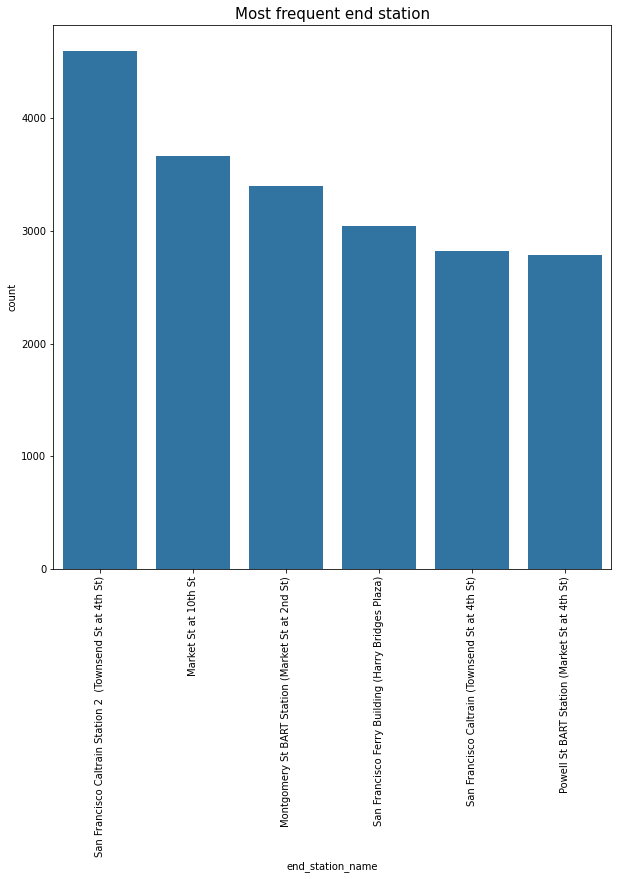

In [73]:
#checking most frequent end station
base_color = sb.color_palette()[0]
station_order = dfc['end_station_name'].value_counts()[:6].index
plt.figure(figsize = [10, 10])
sb.countplot(data=dfc, x='end_station_name',color=base_color,order=station_order );
plt.title('Most frequent end station',fontsize = 15);
plt.xticks(rotation=90);

>Most frequent end station are: San francisco station2, Market St at 10th St, Montgomery St BART Station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The trip duration averge between 1 to 35 minutes with median of 8.4 minutes, peak duration of user is at 5.4 minutes ,75% of duration range is about 12.7 minutes. The duration distrubition is right skewed.<br>
> I have turn trip duration from seconds to minutes for better insights. There is oultiers that need more investigation. For the meanwhile, I have exlude all values more than 35 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found that Male proportion is about 3 times female proportion which need more investigation.<br>
>Users with 18 years old are least users of GoBike which need more investigation.<br>
>Operation performed: age from Birth year, distance from start station and end station, start hour from start time, end hour from end time, start weekday from start time.<br>Operation performed is done to give me insight regarding relation between trip duration and other features.

## Bivariate Exploration

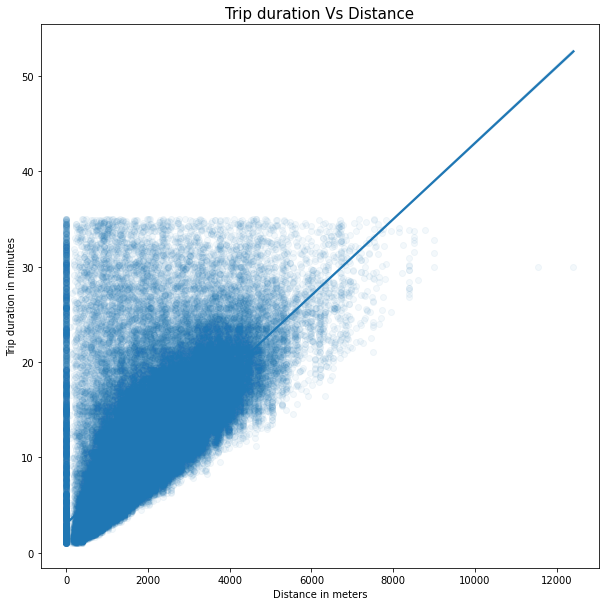

In [74]:
#checking trip duration with distance
plt.figure(figsize = [10, 10])
sb.regplot(data = dfc, x = 'distance', y = 'duration', x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlabel('Distance in meters');
plt.ylabel('Trip duration in minutes');
plt.title('Trip duration Vs Distance',fontsize = 15);


>There is a  strong correlation between distance in meters and trip duration.<br>
>The distance range from 0 to 12410 meters with averge of 1686 meters with duration range from 1 to 35 minutes.<br>
>Most of users make trip that range from 900 to 1500 meters.<br>
>There is a lot of distrubition at 0 distance(users return to start station) with duration range from 1 to 35 minutes with average duration of 12.7 minutes.<br>
>At distance > 0, distance range from 13 to 12410 meters with averge of 1713 meters, duration range from 1 to 35 minutes with average of 9.7 minutes.

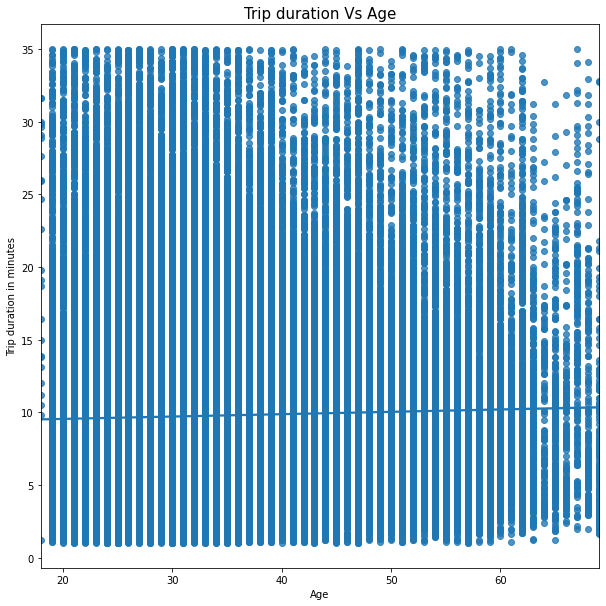

In [75]:
#checking duration with age
plt.figure(figsize = [10, 10])
sb.regplot(data = dfc, x = 'age', y = 'duration');
plt.xlabel('Age');
plt.ylabel('Trip duration in minutes');
plt.title('Trip duration Vs Age',fontsize = 15);

>There is weak correlation between age and trip duration.<br>
>Age range from 24 to 33 years old are the most users of GoBike with averge distance of 1725 meters and averge duration of 9.8 minutes.<br>
>Users with age of 31 years old are the most users of GoBike with averge distance of 1807 meters and averge duration of 10 minutes.<br>
>Old user with age range from 55 to 69 years old are the least users of Gobike.<br>
>Users with 18 years old are rarely using GoBike.


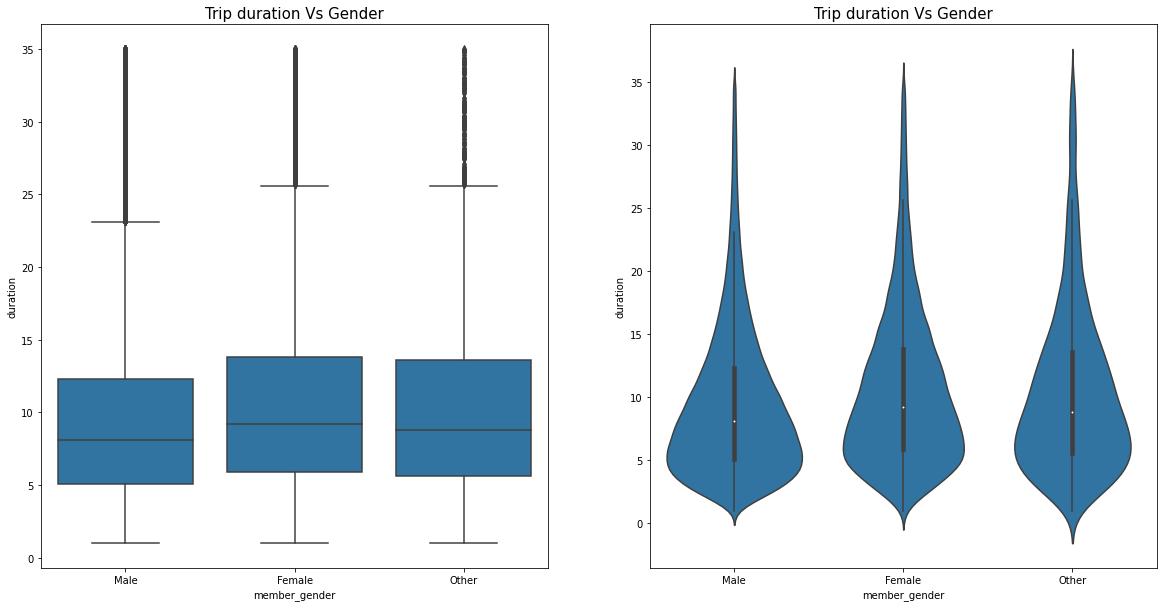

In [76]:
#checking gender  with duration
# Types of member_gender
gender_classes = ['Male', 'Female', 'Other']

# Returns the types for member_gender with the categories and orderedness
gclasses = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)
dfc['member_gender'] = dfc['member_gender'].astype(gclasses);


plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.boxplot(data=dfc, x='member_gender', y='duration', color=base_color);
plt.title('Trip duration Vs Gender',fontsize = 15);
plt.subplot(1, 2, 2)
sb.violinplot(data=dfc,x='member_gender', y='duration',color=base_color, innner=None)
plt.title('Trip duration Vs Gender',fontsize = 15);

>It is difficult to interpet, so I will make a countplot of gender type with duration.

In [77]:
#group duration in bin range
bin_edges = [0,3,6,9,12,15,18,21,24,27,30,33,36]
bin_name = ['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24-27','27-30','30-33','33-36']
dfc['duration_range'] = pd.cut(dfc['duration'],bin_edges ,labels=bin_name)
dfc['duration_range'].replace(['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24-27','27-30','30-33','33-36'],[3,6,9,12,15,18,21,24,27,30,33,36],inplace =True)

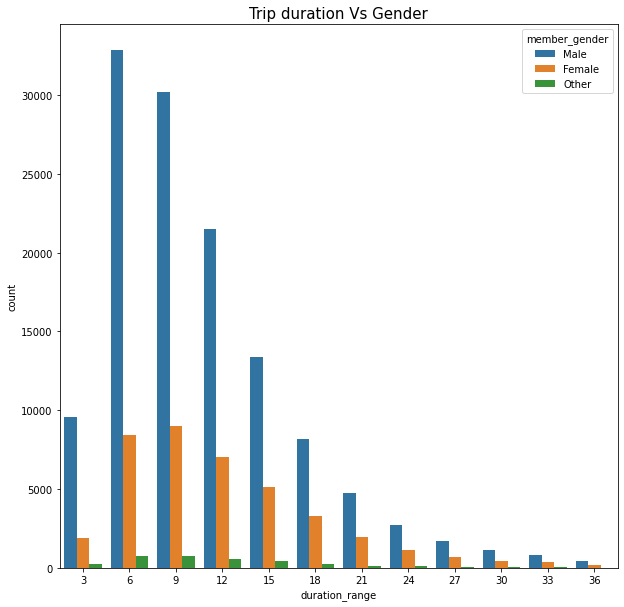

In [78]:
#Returns the types for member_gender with the categories and orderedness
gender_classes = ['Male', 'Female', 'Other']
gclasses = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)
dfc['gender_type'] = dfc['member_gender'].apply(lambda x:x.split()[0])
plt.figure(figsize = [10, 10])
sb.countplot(data = dfc, x = 'duration_range', hue = 'member_gender' );
plt.title('Trip duration Vs Gender',fontsize = 15);

In [79]:
#checking duration with male
dfc.query("member_gender=='Male'")['duration'].value_counts()

4.6     1363
5.4     1362
5.0     1360
5.6     1343
6.0     1307
        ... 
34.8      17
33.1      16
31.9      14
34.3      10
33.5       9
Name: duration, Length: 341, dtype: int64

In [80]:
#checking duration with female
dfc.query("member_gender=='Female'")['duration'].value_counts()

4.8     420
5.4     400
6.4     400
5.8     394
7.0     384
       ... 
34.9      5
33.7      4
34.4      4
34.7      4
33.2      4
Name: duration, Length: 341, dtype: int64

In [81]:
#checking duration with other
dfc.query("member_gender=='Other'")['duration'].value_counts()

4.4     41
7.0     41
6.0     38
6.2     37
4.8     36
        ..
34.6     1
24.0     1
28.4     1
32.0     1
33.6     1
Name: duration, Length: 313, dtype: int64

>The peak of male trip duration is from 4.6 to 5.4 minutes.<br>
>The peak of female trip duration is from 4.8 to 6.4 minutes.<br>
>The peak of other trip duration is from 4.4 to 7 minutes.<br>
>The quantities of male is higher than female and other in using GoBike.

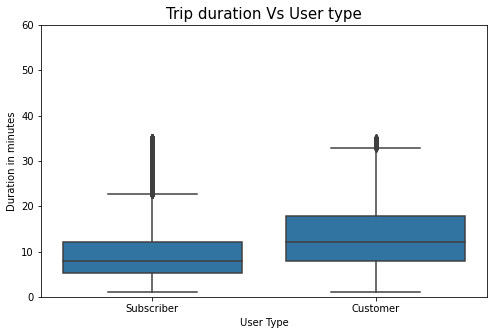

In [82]:
#checking user type and duration
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = dfc, x = 'user_type', y = 'duration', color = base_color);
plt.ylim([0, 60]);
plt.xlabel('User Type');
plt.ylabel('Duration in minutes');
plt.title('Trip duration Vs User type',fontsize = 15);

In [83]:
dfc.query("user_type=='Customer'")['duration'].mean(),dfc.query("user_type=='Subscriber'")['duration'].mean()


(13.571405877680698, 9.401024364126615)

>The customer user type have averge trip duration of 13.5 minutes and subscribe user type have averge trip duration of 9.4 minutes. I thought it is the opposite.

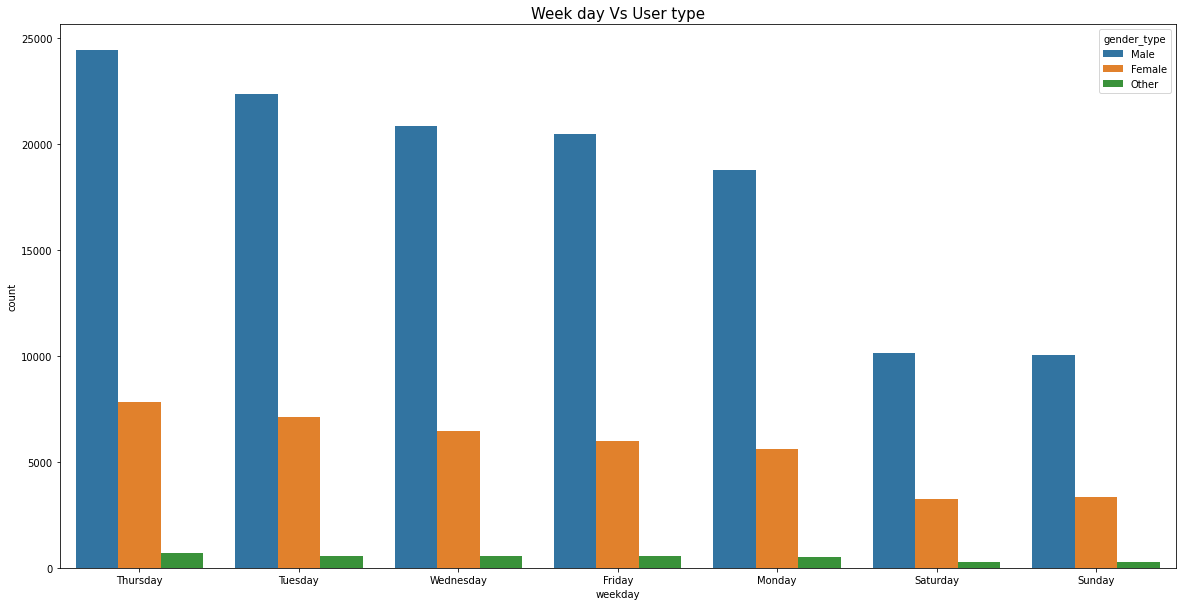

In [84]:
#checking week day with gender
gender_classes = ['Male', 'Female', 'Other']

# Returns the types for member_gender with the categories and orderednessb
gclasses = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)
dfc['gender_type'] = dfc['member_gender'].apply(lambda x:x.split()[0])
day_order = dfc['weekday'].value_counts().index
plt.figure(figsize = [20,10])
sb.countplot(data = dfc, x = 'weekday', hue = 'gender_type',order=day_order);
plt.title('Week day Vs User type',fontsize = 15);

> User use GoBike most at Thursday and Tuesday.<br>
> User use GoBike least at Saturday and Sunday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration has strong correlation with distance and weak correlation with age.<br>
> Most users are male.<br>
> Most users age range varies from 24 to 33 years old.<br>
> The customer user type have averge trip duration higher than subscribe user type.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>I found that Thursday and Tuseday have the most bike rental. Sunday and sturday heave the lowest bike rental.<br>
>I thought that subscriber have more bike rental than customer, but I found the opposite is true.

## Multivariate Exploration


c:\users\htm\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


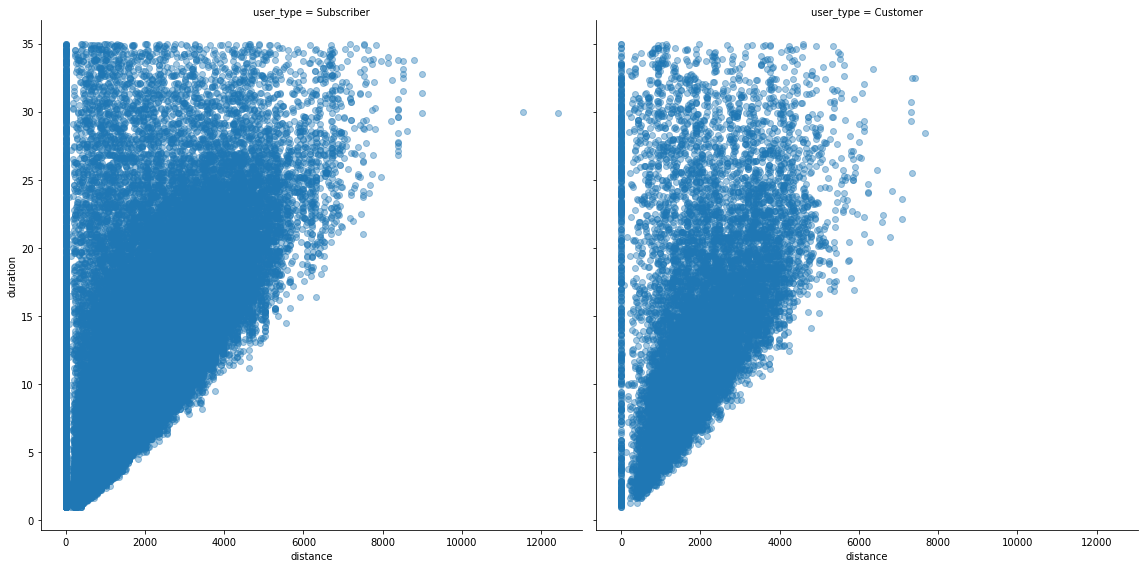

In [85]:
#checking user type with distance and trip duration
g = sb.FacetGrid(data = dfc, col = 'user_type', size = 8)
g.map(plt.scatter, 'distance','duration',alpha = 2/5);

>Most customer user type have short trip duration that varies from 5 to 25 minutes with distance that varies 0 to 4000 meters.<br>
>Most Subsriber user type have long trip duration that varies from 5 to 35 minutes with distance that varies from 0 to 6000 meters

c:\users\htm\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


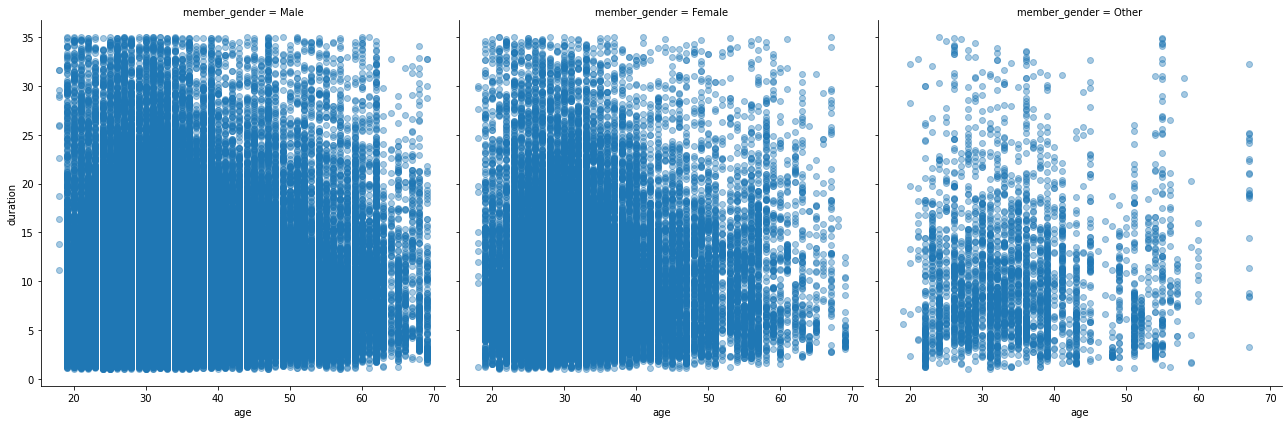

In [86]:
#checking user type with age and trip duration
g = sb.FacetGrid(data = dfc, col = 'member_gender', size = 6)
g.map(plt.scatter, 'age','duration',alpha = 2/5);

>Majorty of users are male.
>Majorty of male user range from 25 to 33 years old with trip duration up to 35 minutes.<br>
>Majorty of female user range from 30 to 35 years old with trip duration up to 30 minutes.<br>


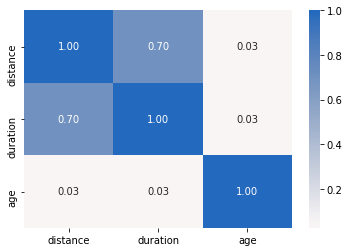

In [87]:
#checking age with distance and trip duration
dfc_stats=['distance','duration', 'age']
sb.heatmap(dfc[dfc_stats].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

>There is strong correlation between distance and duration.<br>
>there is no correlation between age and distance, no correlation between age and duration.

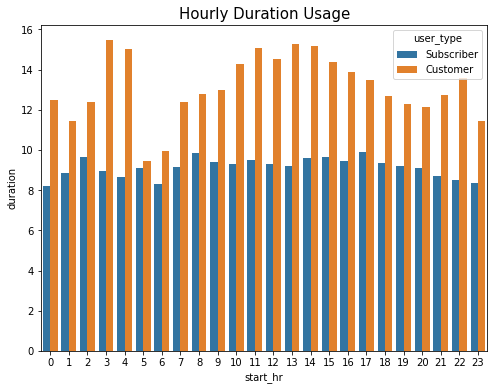

In [88]:
#checking user type with start_hr and trip duration
plt.figure(figsize=(8,6))
plt.title('Hourly Duration Usage', fontsize=15)
sb.barplot(data=dfc, x='start_hr', y='duration', ci=None, hue='user_type');

>GoBike usage for Subscriber is almost the same regarding hour.<br>
>GoBike usage for customer differ according hour. The most usage is at 3,4,11,13,14 o'clock

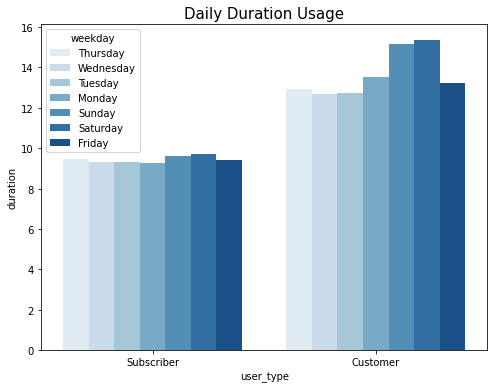

In [89]:
#checking user type with weekday and trip duration
plt.figure(figsize=(8,6))
plt.title('Daily Duration Usage', fontsize=15)
sb.barplot(data=dfc, x='user_type', y='duration', ci=None,hue='weekday',palette = 'Blues');

>Trip duration for Subscriber is almost the same regarding week day.<br>
>Trip duration for customer is higher than subscriber especially in Saturday and Sunday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Most customer user type have short trip duration that varies from 5 to 25 minutes with distance that varies 0 to 4000 meters.<br>
>Most Subsriber user type have long trip duration that varies from 5 to 35 minutes with distance that varies from 0 to 6000 meters.<br>
>Majorty of users are male.<br>
>Majorty of male user age range from 25 to 33 years old with trip duration up to 35 minutes.<br>
>Majorty of female user age range from 30 to 35 years old with trip duration up to 30 minutes.<br>
>There is strong correlation between distance and duration.<br>
>There is no correlation between age and distance, no correlation between age and duration.
>GoBike usage for Subscriber is almost the same regarding hour.<br>
>GoBike usage for customer differ according hour. The most usage is at 3,4,11,13,14 o'clock<br>
>GoBike usage for Subscriber is almost the same regarding week day.<br>
>GoBike usage for customer is higher than subscriber especially in Saturday and Sunday.

### Were there any interesting or surprising interactions between features?

> I thought that age have effect on trip duration, but i found it has no effect at all.<br>
> The male user are much higher than female and other users, which need more investigation.<br>
> The customer user type have averge trip duration greater than subscribe user type.<br>
> GoBike usage for customer differ according daily hour and week day.

### Analysis Limitation
> There are extreme values that need more investigation.<br>
> Dataset only include one month, Feb 2019.